In [25]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import hypertools as hyp
%matplotlib notebook

In [26]:
#Read in the data and separate the sheets
fname = 'At Risk Students For Dartmouth.xlsx'
sheet1 = 'Year 16-17'
sheet2 = 'Year 17-18 9.25.17'
columns = ('id', 'grade', 'age', 'school', 'sex', 'homeless', 'disadvantaged', 'specialneeds',
           'excused1', 'unexcused1', 'tardy1',
           'excused2', 'unexcused2', 'tardy2',
           'excused3', 'unexcused3', 'tardy3',
           'excused4', 'unexcused4', 'tardy4')
y1_data = pd.read_excel(fname, sheetname=sheet1, skiprows=[0], names=columns)
y2_data = pd.read_excel(fname, sheetname=sheet2, skiprows=[0], names=columns)

#use student IDs as the index
y1_data.set_index('id', inplace=True)
y2_data.set_index('id', inplace=True)

In [27]:
#in "disadvantaged" column, replace "YES" with 1 and NaN with 0
y1_data['disadvantaged'] = y1_data['disadvantaged'].map({np.nan: 0, 'YES': 1})
y2_data['disadvantaged'] = y2_data['disadvantaged'].map({np.nan: 0, 'YES': 1})

#in "specialneeds" column, 
y1_data['specialneeds'] = y1_data['specialneeds'].map({np.nan: 0, 504: '504', 'IEP': 'IEP'})
y2_data['specialneeds'] = y2_data['specialneeds'].map({np.nan: 0, 504: '504', 'IEP': 'IEP'})

#replace '---' with 0 (Fourth marking period columns)
y1_data.replace('---', 0, inplace=True)
y2_data.replace('---', 0, inplace=True)

In [12]:
#Create dummy variables for male and female, create new dataframe
y1_data_sex = pd.get_dummies(y1_data['sex'])
y1_data_new = y1_data.join(y1_data_sex)
y1_data_new

,grade,age,school,sex,homeless,disadvantaged,specialneeds,excused1,unexcused1,tardy1,...,unexcused2,tardy2,excused3,unexcused3,tardy3,excused4,unexcused4,tardy4,F,M
id,,,,,,,,,,,,,,,,,,,,,
300053,10,16,Hartford High School/HACTC,F,N,NaN,NaN,22,0,0,...,0,0,0,0,1,2,2,0,1,0
300339,12,18,Hartford High School/HACTC,F,N,NaN,NaN,4,2,4,...,9,6,27,15,5,36,15,7,1,0
300340,11,17,Hartford High School/HACTC,M,N,NaN,NaN,1,0,0,...,1,1,3,0,5,24,0,1,0,1
300344,9,15,Hartford High School/HACTC,M,N,NaN,NaN,0,0,0,...,0,0,0,1,0,3,0,0,0,1
300345,8,15,Hartford Memorial Middle School,M,N,NaN,NaN,0,0,0,...,0,1,4,0,1,5,0,3,0,1
300628,11,17,Hartford High School/HACTC,F,N,NaN,NaN,2,1,1,...,0,3,6,0,5,2,4,11,1,0
300630,9,15,Hartford High School/HACTC,M,N,NaN,NaN,1,0,1,...,0,0,0,1,0,2,1,2,0,1
300631,8,14,Hartford Memorial Middle School,F,N,NaN,NaN,0,0,1,...,0,0,2,1,0,0,2,0,1,0
300908,11,18,Hartford High School/HACTC,F,N,NaN,NaN,1,0,0,...,0,1,3,0,3,0,9,6,1,0


In [19]:
#Drop all strings in grade column
y1_data_grade = y1_data_new.loc[list(map(lambda x: x not in ['K', 'AW', 'PA', 'PD', 'PP'], y1_data_new['grade']))]

In [28]:
#Create new year-long columns
y1_data_new['excused']=y1_data_new['excused1'] + y1_data_new['excused2'] + y1_data_new['excused3']
y1_data_new['unexcused']=y1_data_new['unexcused1'] + y1_data_new['unexcused2'] + y1_data_new['unexcused3']
y1_data_new['tardy']=y1_data_new['tardy1'] + y1_data_new['tardy2'] + y1_data_new['tardy3']

<IPython.core.display.Javascript object>


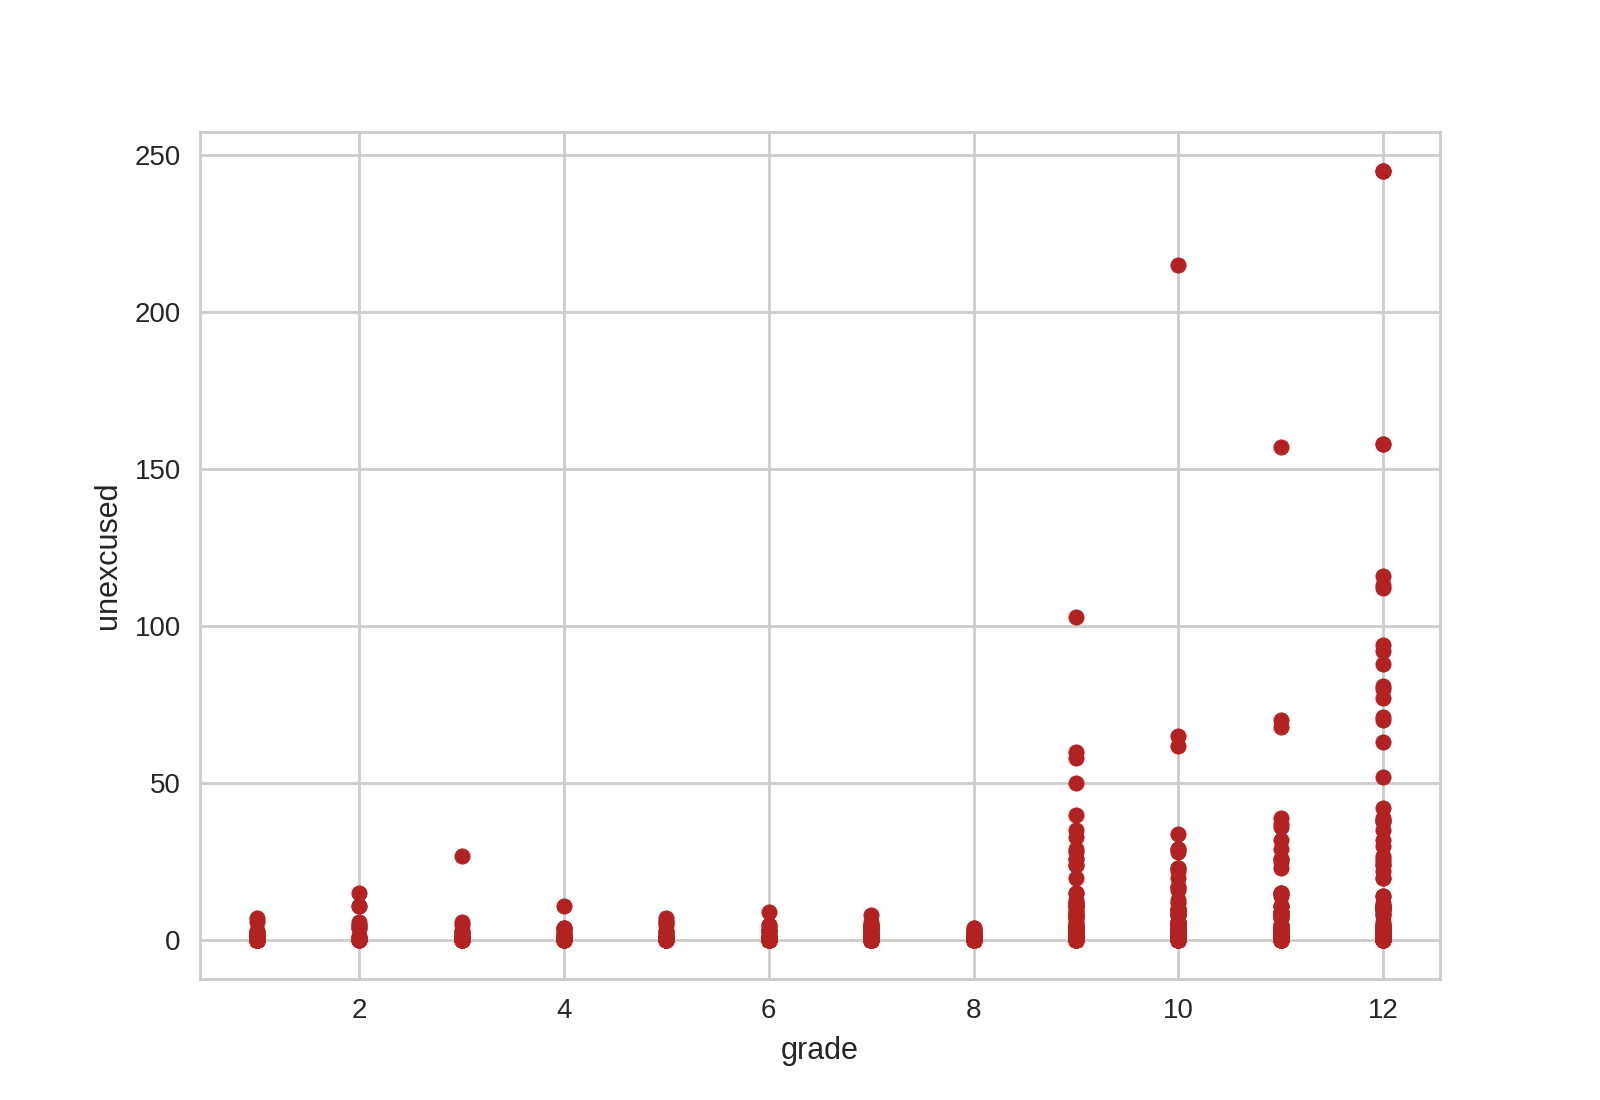

In [52]:
y1_data_grade.plot.scatter(x='grade', y='unexcused', s=30,c='#B22222')

In [77]:
lm = smf.ols(formula='tardy ~ grade', data=y1_data_new).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tardy   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     8.323
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           4.67e-19
Time:                        18:58:58   Log-Likelihood:                -3711.6
No. Observations:                 969   AIC:                             7457.
Df Residuals:                     952   BIC:                             7540.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.7024      1.227      3.831      0.000       2.294       7.111
grade[T.2]      6.0623      2.992      2.026      0.043       0.191      11.933
grade[T.3]      1.4458      2.489      0.581      0.561      -3.438       6.330
grade[T.4]      1.1865      2.489      0.477      0.634      -3.697       6.070
grade[T.5]      1.0119      2.455      0.412      0.680      -3.805       5.829
grade[T.6]      0.5576      2.009      0.278      0.781      -3.386       4.501
grade[T.7]     -0.8437      1.698     -0.497      0.619      -4.175       2.488
grade[T.8]      0.0754      1.752      0.043      0.966      -3.362       3.513
grade[T.9]      3.6428      1.621      2.248      0.025       0.462       6.823
grade[T.10]     6.0643      1.707      3.553      0.000       2.715       9.413
grade[T.11]     6.1548      1.702      3.616      0.000       2.815       9.495
grade[T.12]    11.7924      1.685      6.999      0.000       8.486      15.099
grade[T.AW]    -4.7024     11.316     -0.416      0.678     -26.909      17.505
grade[T.K]     -0.1354      1.677     -0.081      0.936      -3.426       3.155
grade[T.PA]    -3.6786      2.126     -1.730      0.084      -7.851       0.493
grade[T.PD]    -4.7024     11.316     -0.416      0.678     -26.909      17.505
grade[T.PP]    -3.5206      2.311     -1.523      0.128      -8.056       1.015
==============================================================================
Omnibus:                      601.228   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5906.452
Skew:                           2.759   Prob(JB):                         0.00
Kurtosis:                      13.763   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


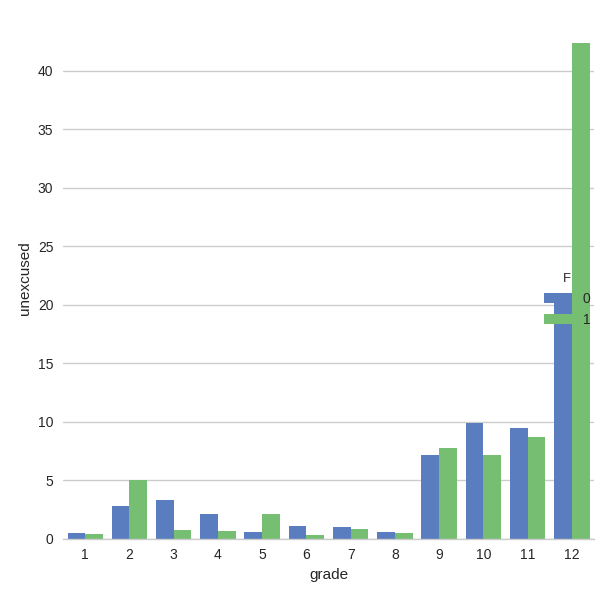

In [79]:
sns.set(style="whitegrid")

g = sns.factorplot(x="grade", y="unexcused", hue="F", data=y1_data_grade,
                   size=6, kind="bar", ci=0, palette="muted")
g.despine(left=True)

<IPython.core.display.Javascript object>


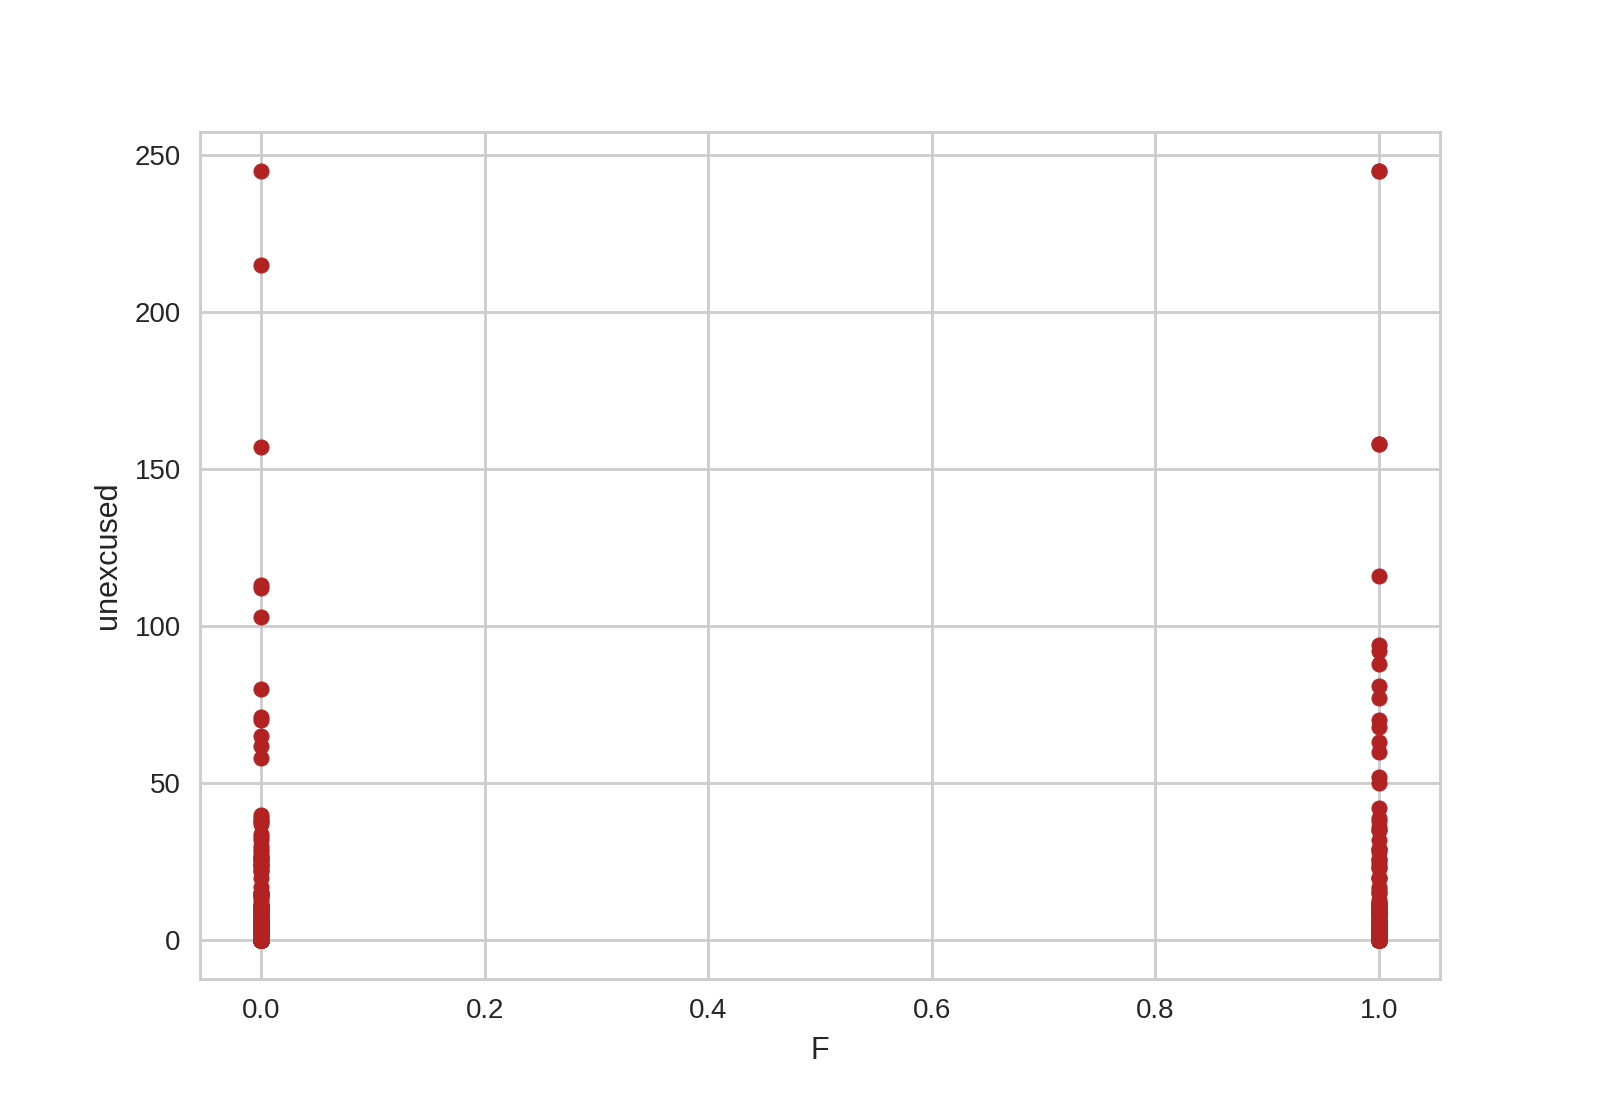

In [55]:
y1_data_grade.plot.scatter(x='F', y='unexcused', s=30,c='#B22222')

In [67]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="grade", y="unexcused", hue="F", data=y1_data_grade, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

KeyError: 0

<IPython.core.display.Javascript object>


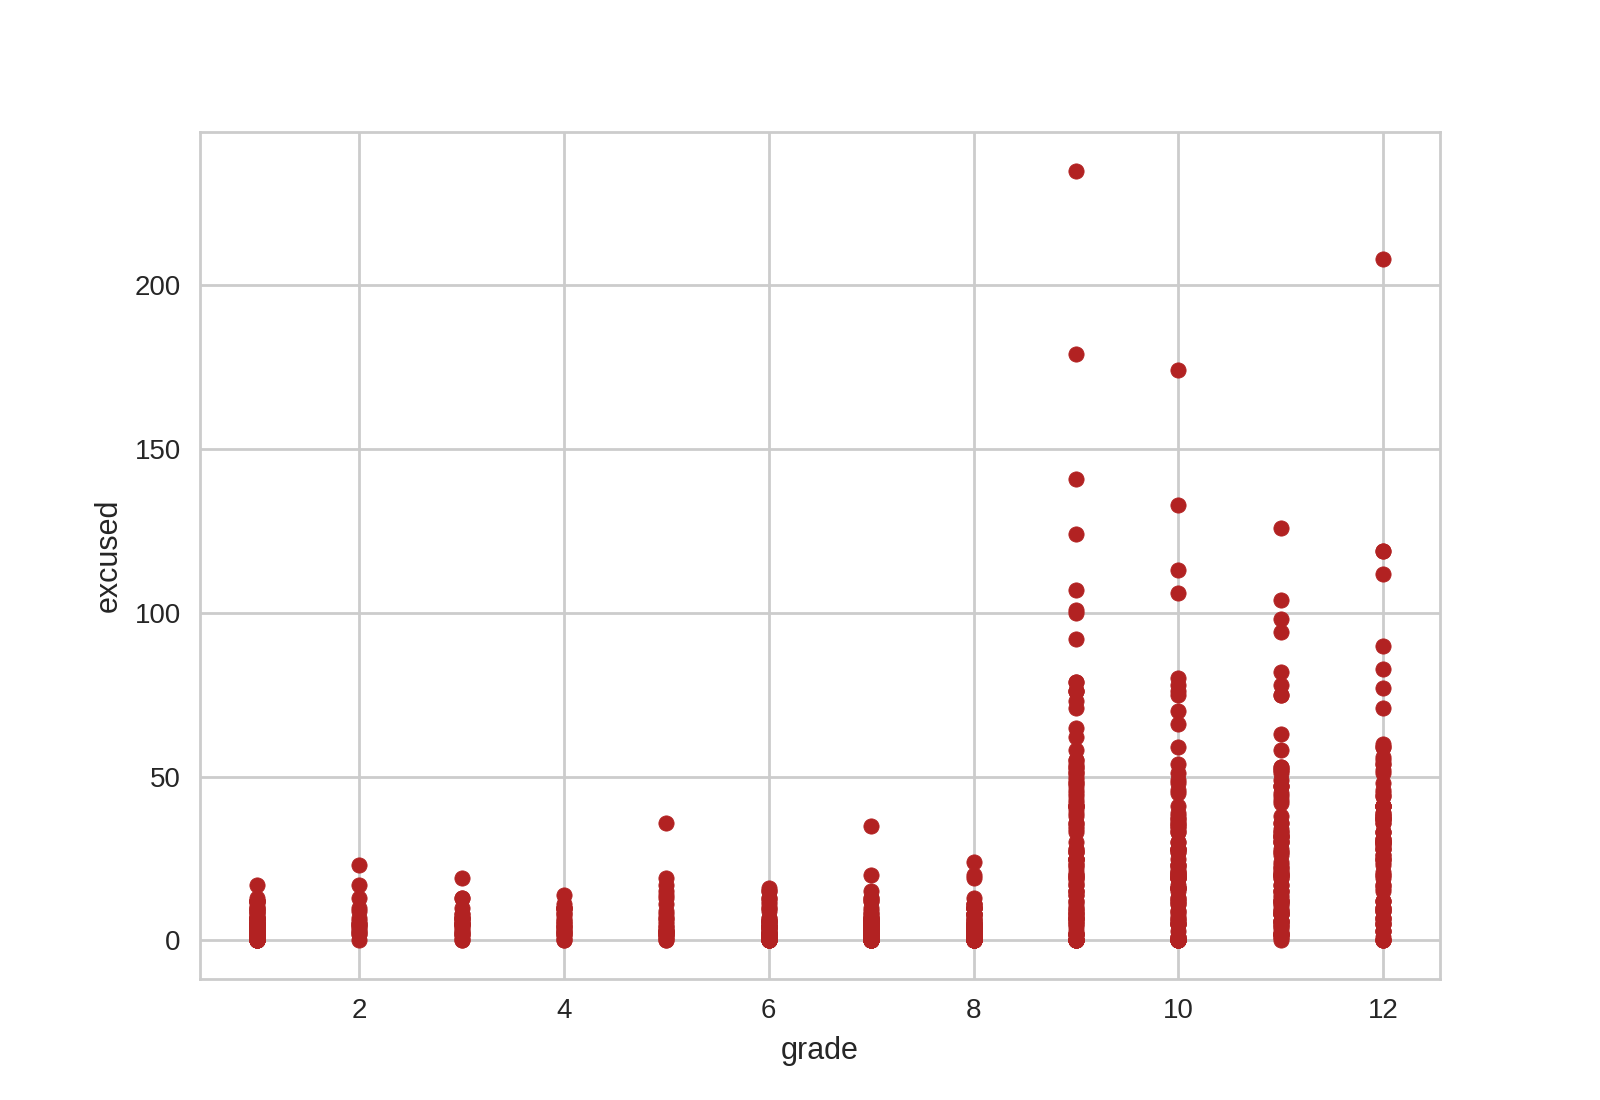

In [57]:
y1_data_grade.plot.scatter(x='grade', y='excused', s=30,c='#B22222')

<IPython.core.display.Javascript object>


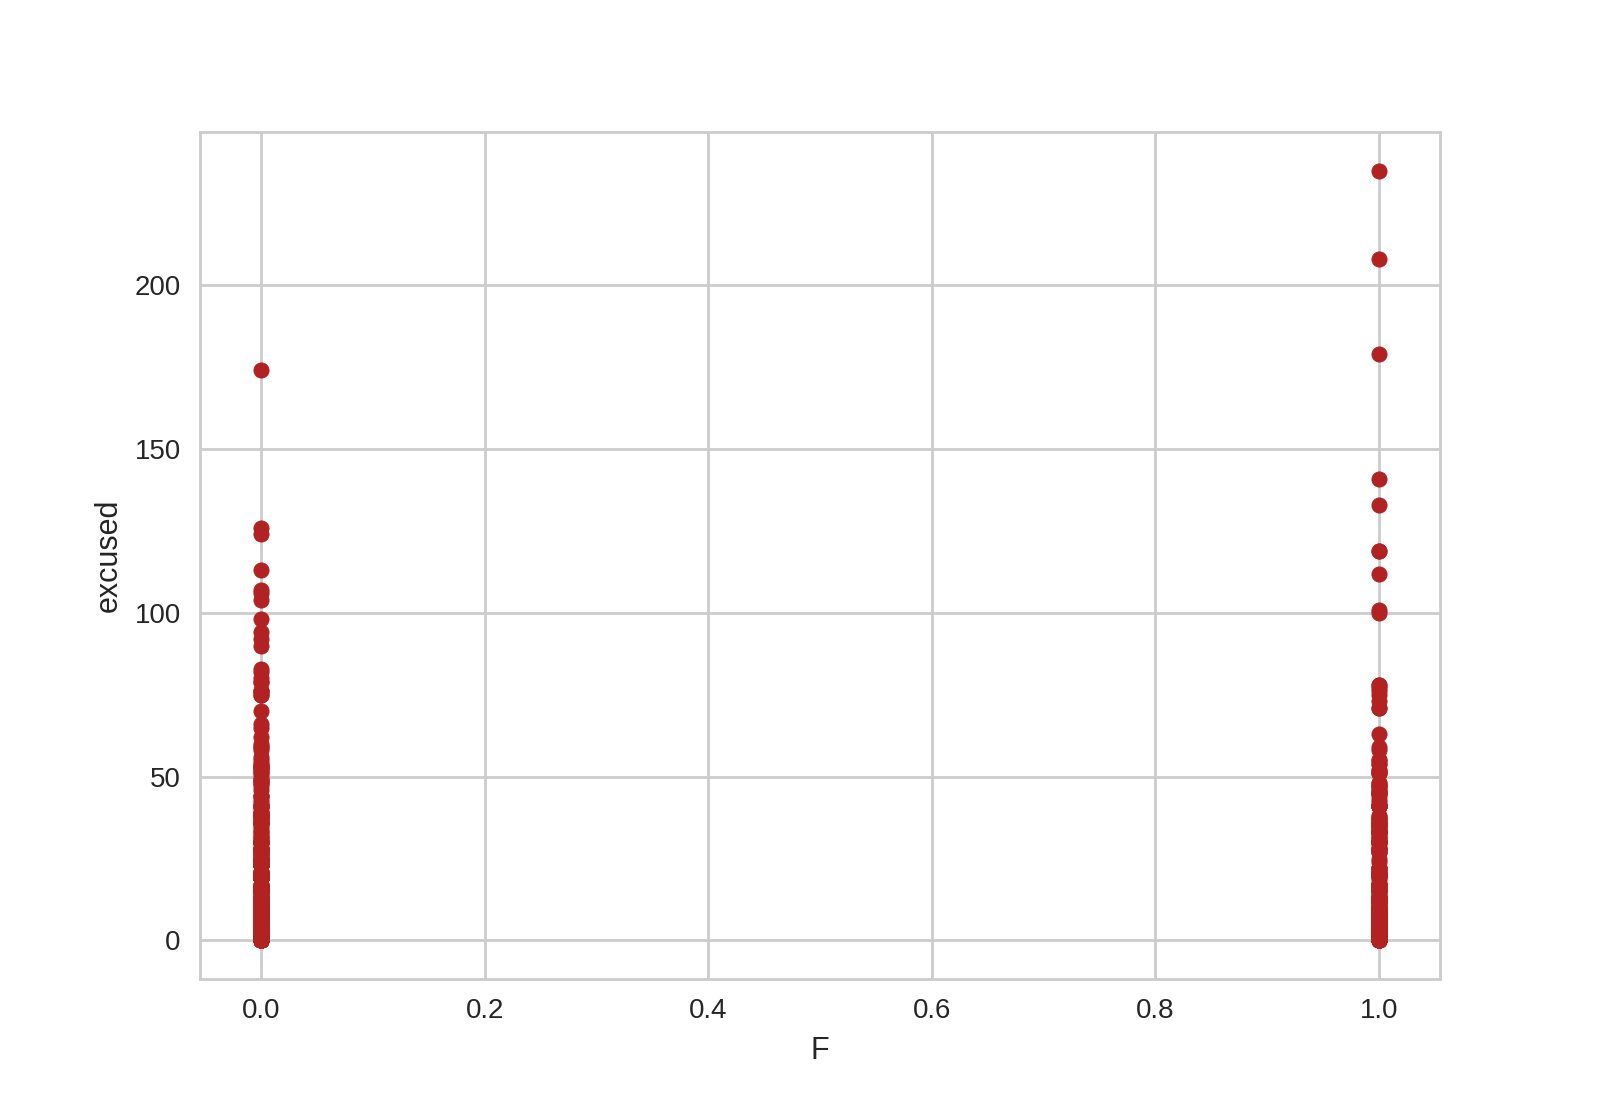

In [58]:
y1_data_grade.plot.scatter(x='F', y='excused', s=30,c='#B22222')

<IPython.core.display.Javascript object>


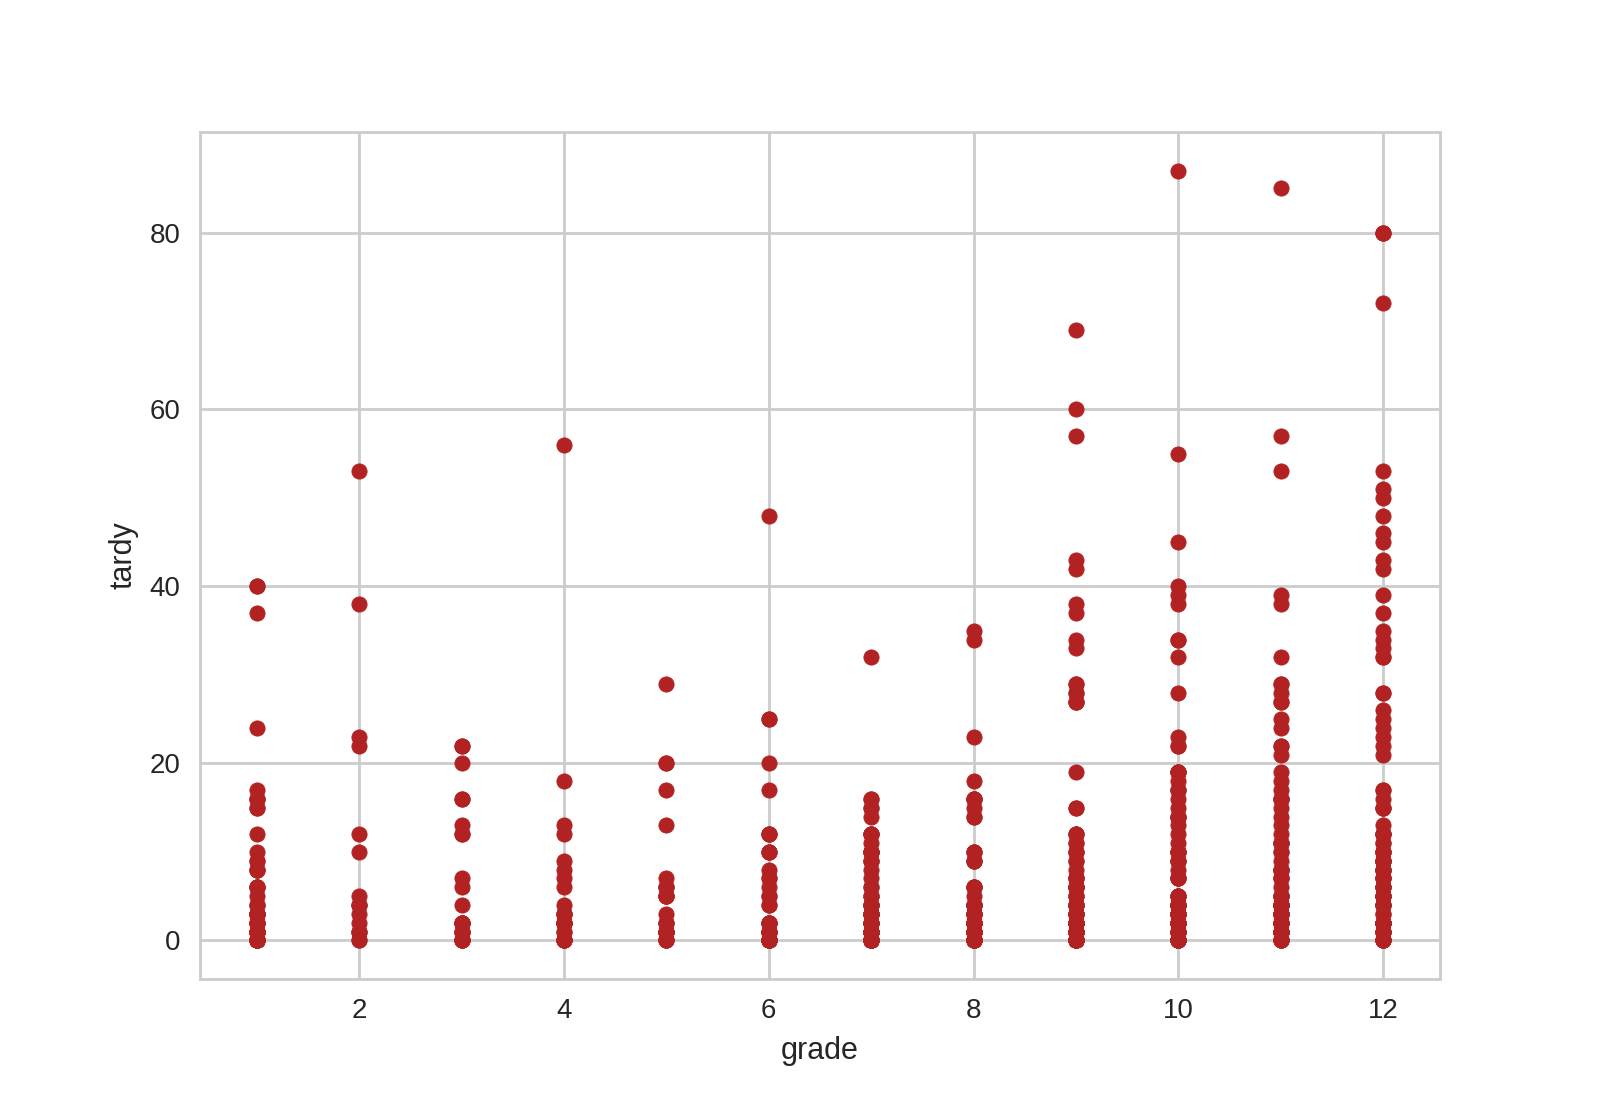

In [69]:
y1_data_grade.plot.scatter(x='grade', y='tardy', s=30,c='#B22222')

<IPython.core.display.Javascript object>


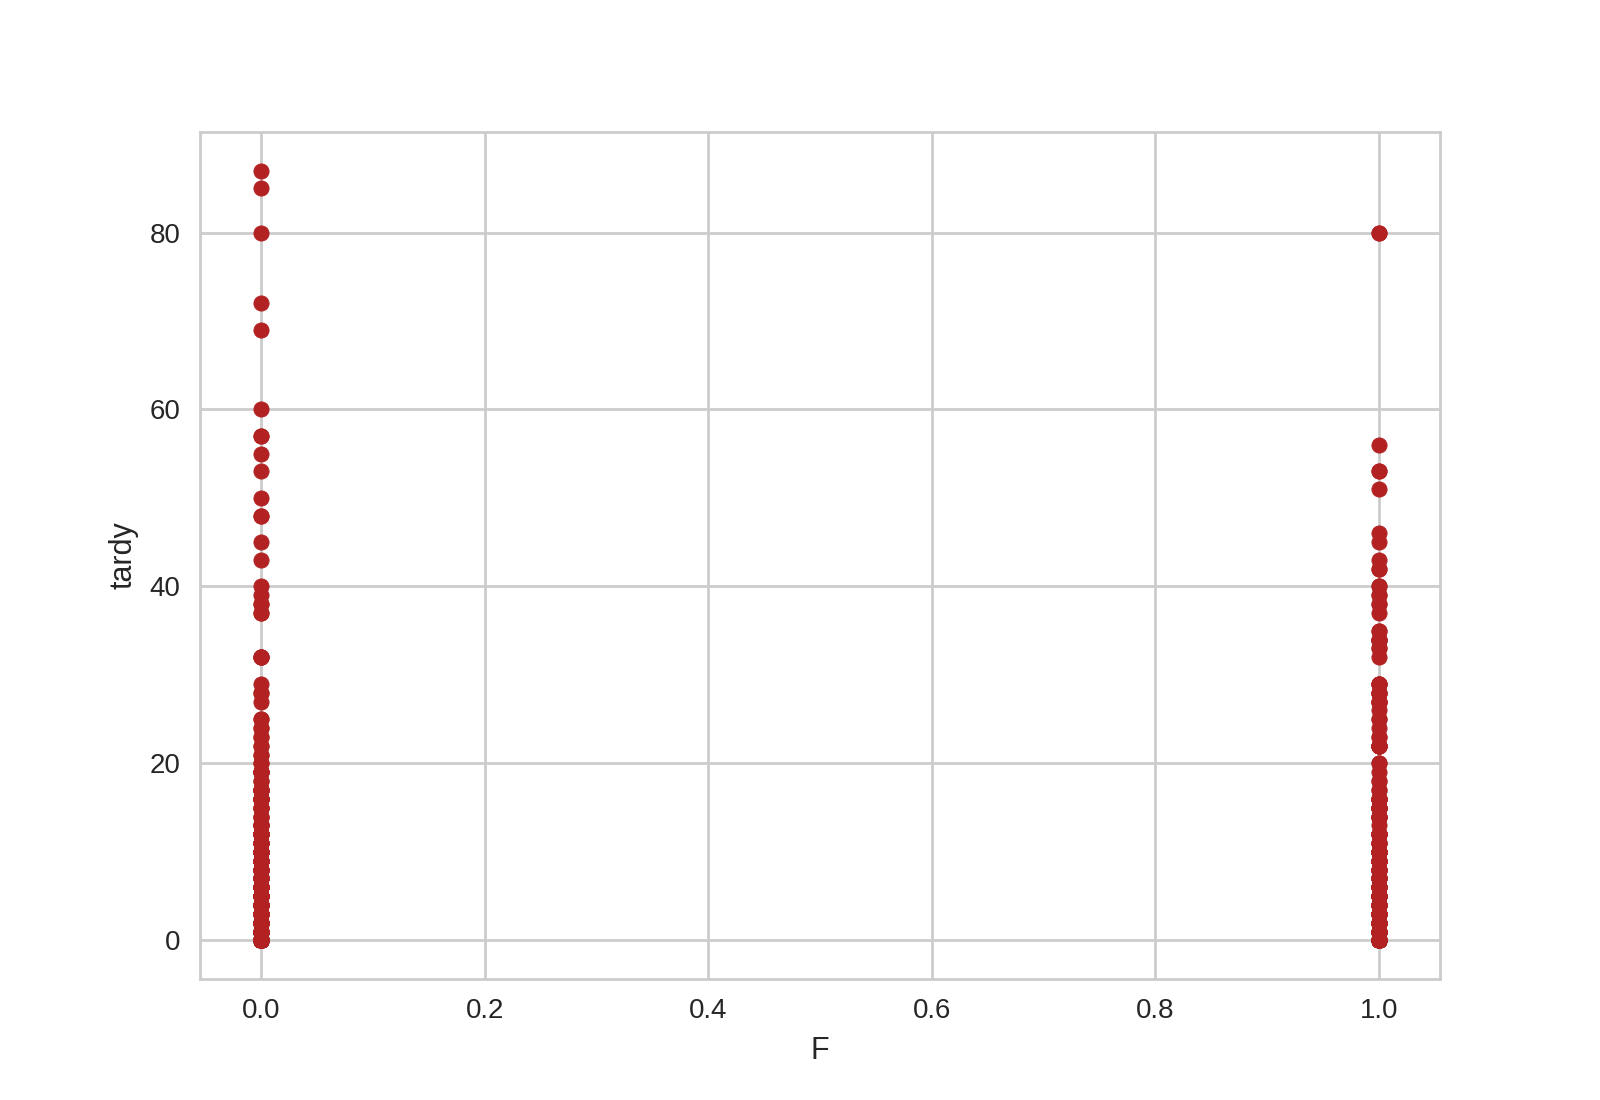

In [70]:
y1_data_grade.plot.scatter(x='F', y='tardy', s=30,c='#B22222')